**Instructor: Parijat Dube**

Modified by Li Shen 2023/03/06

# Problem 1 - *Transfer learning: Shallow learning vs Finetuning* **(70 points)**

In this problem we will train a convolutional neural network for image classification using transfer learning. Transfer learning involves training a base network from scratch on a very large dataset (e.g., Imagenet1K with 1.2 M images and 1K categories) and then using this base network either as a feature extractor or as an initialization network for target task. Thus two major transfer learning scenarios are as follows:

- **Finetuning the base model:** Instead of random initialization, we initialize the network with a pretrained network, like the one that is trained on Imagenet dataset. Rest of the training looks as usual however the learning rate schedule for transfer learning may be different.
- **Base model as fixed feature extractor:** Here, we will freeze the weights for all of the network except that of the final fully connected layer. This last fully connected layer is replaced with a new one with random weights and only this layer is trained.



   


##### **Part 1** For fine-tuning you will select a target dataset from the Visual-Decathlon challenge. Their web site (link below) has several datasets which you can download. Select any one of the visual decathlon dataset and make it your target dataset for transfer learning. **Important: Do not select Imagenet1K as the target dataset since it is very large.** Since you do not have access to the test set labels, you only need to show the accuracy of the validation set.

  - 1.1. **Finetuning:** You will first load a pretrained model (e.g. Resnet18) and change the final fully connected layer output to the number of classes in the target dataset. Describe your target dataset features, number of classes and distribution of images per class (i.e., number of images per class). For two randomly selected classes, show 5 sample images per class from your target dataset. **(10)**

In [ ]:
#LOADING CIFAR-100 DATASET - 
  #https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR100.html - had load this way because I didn't have a decathalon account
  #https://www.robots.ox.ac.uk/~vgg/decathlon/

import torch
import torchvision          
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np

VAL_SIZE = 0.5
BATCH_SIZE = 64

transform = transforms.Compose([
        transforms.Resize(72), #from https://www.robots.ox.ac.uk/~vgg/decathlon/
        transforms.ToTensor(),
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
    ]) #from - https://github.com/HobbitLong/RepDistiller/blob/master/dataset/cifar100.py



trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)

#testset = torchvision.datasets.CIFAR100(root='./data', train=False,
 #                                      download=True, transform=transform)

train_indices, val_indices, _, _ = train_test_split(
    range(len(trainset)),
    trainset.targets,
    stratify=trainset.targets,
    test_size=VAL_SIZE,
) 


train_split = Subset(trainset, train_indices)
val_split = Subset(trainset, val_indices)

# create data loaders
train_batches = DataLoader(train_split, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_batches = DataLoader(val_split, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
#test_batches = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data


In [ ]:
# requires meta file from kaggle 
import pickle
with open('/content/meta', 'rb') as fo:
  cifar100_dict = pickle.load(fo, encoding='utf8')

#https://www.kaggle.com/datasets/fedesoriano/cifar100?select=meta

In [ ]:
#gives values of classes in CIFAR-100
class_names = dict(list(enumerate(cifar100_dict['fine_label_names'])))
print('These are the 100 class names for the CIFAR-100 dataset')


These are the 100 class names for the CIFAR-100 dataset


In [ ]:
np.unique(trainset.targets,return_counts=True)
print('there are 500 images per class in the entire training dataset')

there are 500 images per class in the entire training dataset


In [ ]:
train_features, train_labels = next(iter(train_batches))


In [ ]:
np.unique(train_labels.numpy(),return_counts=True)

print('there are about 1-2 images per class in one batch')

there are about 1-2 images per class in one batch


In [ ]:
train_features.shape 

torch.Size([64, 3, 72, 72])

In [ ]:
train_labels.shape #batchsize

torch.Size([64])

In [ ]:
train_labels.unique

<bound method Tensor.unique of tensor([28, 48, 17, 70, 73, 87, 21, 73, 89, 54, 83, 51, 19, 76, 86, 78, 66, 38,
        83, 29, 39, 34, 27, 32, 28, 88,  1, 49, 37, 14, 35, 50, 16, 22, 19, 16,
        82, 61, 92, 64, 20, 83, 55,  2, 87, 86, 57,  3, 13, 93, 50, 53, 45, 52,
        98,  5, 92, 38, 63, 38, 32, 46, 31, 40])>

In [ ]:
import random 
img_classes = random.sample(range(0, 100), 2)
img_classes

[41, 52]

In [ ]:
int(np.where(labels==img_classes[0])[0][0])

10

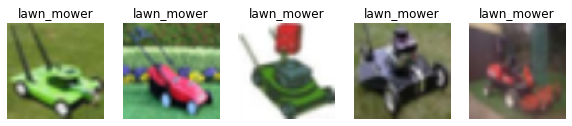

In [ ]:
label1 = class_names[img_classes[0]] 

count1 = 0

figure = plt.figure(figsize=(10, 10))

while count1 < 5: 
  dataiter = iter(train_batches)
  images, labels = next(dataiter)
  if img_classes[0] not in labels:
    continue
  else:
    count1+=1
  img = images[int(np.where(labels==img_classes[0])[0][0])]
  img = img.permute(1,2,0)
  label = labels[int(np.where(labels==img_classes[0])[0][0])]
  mean = torch.tensor([0.5071, 0.4867, 0.4408])
  std = torch.tensor([0.2675, 0.2565, 0.2761])
  img = std * img + mean
  img = np.clip(img, 0, 1)
  figure.add_subplot(1, 5, count1)
  plt.title(class_names[int(label)])
  plt.axis("off")
  #plt.imshow(img.permute(1,2,0))
  plt.imshow(torchvision.utils.make_grid(img)) #
  #plt.imshow(torchvision.utils.make_grid(img.permute(1,2,0))) #
  #plt.pause(0.001)  # pause a bit so that plots are updated

plt.show()
  

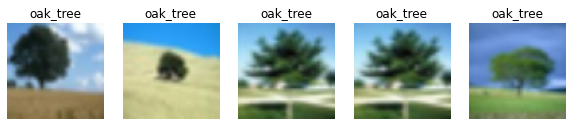

In [ ]:
label2 = class_names[img_classes[1]] 

count2 = 0

figure = plt.figure(figsize=(10, 10))

while count2 < 5: 
  dataiter = iter(train_batches)
  images, labels = next(dataiter)
  if img_classes[1] not in labels:
    continue
  else:
    count2+=1
  img = images[int(np.where(labels==img_classes[1])[0][0])]
  img = img.permute(1,2,0)
  label = labels[int(np.where(labels==img_classes[1])[0][0])]
  mean = torch.tensor([0.5071, 0.4867, 0.4408])
  std = torch.tensor([0.2675, 0.2565, 0.2761])
  img = std * img + mean
  img = np.clip(img, 0, 1)
  figure.add_subplot(1, 5, count2)
  plt.title(label2)
  plt.axis("off")
  #plt.imshow(img.permute(1,2,0))
  plt.imshow(torchvision.utils.make_grid(img)) #
  #plt.imshow(torchvision.utils.make_grid(img.permute(1,2,0))) #
  #plt.pause(0.001)  # pause a bit so that plots are updated

plt.show()
  

In [ ]:
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
import torch.optim as optim

model = models.resnet18(pretrained=True)
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

#https://pytorch.org/vision/stable/models.html

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

  - 1.2. First finetune by setting the same value of hyperparameters (SGD with learning rate=0.001, momentum=0.9) for all the layers. Keep batch size of 64 and train for 50-60 epochs or until model converges well. You will use a multi-step learning rate schedule and decay by a factor of 0.1 ($\gamma = 0.1$ in the link below). You can choose steps at which you want to decay the learning rate but do one or more drops during the training. So the first drop will bring down the learning rate to 0.0001, second to 0.00001, and so on. For example, if training for 60 epochs, first drop can happen at epoch 15, second at epoch 30 and third at epoch 45. **(20)**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True

In [ ]:
#loading pretrained resnet18 model

model = models.resnet18(pretrained=True)
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

#https://pytorch.org/vision/stable/models.html

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                batches = train_batches
            else:
                model.eval()   # Set model to evaluate mode
                batches = val_batches

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.

            for inputs, labels in batches:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / 25000
            epoch_acc = running_corrects.double() / 25000

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_batches):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_ft = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=50)

Epoch 0/49
----------
train Loss: 3.8295 Acc: 0.2835
val Loss: 1.9990 Acc: 0.4724

Epoch 1/49
----------
train Loss: 1.5444 Acc: 0.5832
val Loss: 1.6344 Acc: 0.5520

Epoch 2/49
----------
train Loss: 0.9775 Acc: 0.7234
val Loss: 1.5114 Acc: 0.5946

Epoch 3/49
----------
train Loss: 0.5813 Acc: 0.8388
val Loss: 1.5617 Acc: 0.5958

Epoch 4/49
----------
train Loss: 0.3042 Acc: 0.9258
val Loss: 1.5825 Acc: 0.6018

Epoch 5/49
----------
train Loss: 0.1470 Acc: 0.9750
val Loss: 1.6256 Acc: 0.6114

Epoch 6/49
----------
train Loss: 0.0791 Acc: 0.9915
val Loss: 1.6624 Acc: 0.6132

Epoch 7/49
----------
train Loss: 0.0437 Acc: 0.9979
val Loss: 1.6514 Acc: 0.6158

Epoch 8/49
----------
train Loss: 0.0394 Acc: 0.9980
val Loss: 1.6482 Acc: 0.6146

Epoch 9/49
----------
train Loss: 0.0365 Acc: 0.9990
val Loss: 1.6585 Acc: 0.6140

Epoch 10/49
----------
train Loss: 0.0343 Acc: 0.9987
val Loss: 1.6570 Acc: 0.6148

Epoch 11/49
----------
train Loss: 0.0326 Acc: 0.9992
val Loss: 1.6625 Acc: 0.6154

Ep

  - 1.3. Next keeping all the hyperparameters (including multi-step learning rate schedule) same as before, but change the learning rate to 0.01 and 0.1 for all the layers. Again finetune the model and report the final accuracy. How does the accuracy with the three learning rates compare? Which learning rate gives you the best accuracy on the target dataset? **(10)**

In [ ]:
### LEARNING RATE = 0.01
model_ft = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft2 = train_model(model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=50)

Epoch 0/49
----------
train Loss: 1.0542 Acc: 0.6879
val Loss: 3.0867 Acc: 0.3593

Epoch 1/49
----------
train Loss: 0.8253 Acc: 0.7529
val Loss: 3.1307 Acc: 0.3664

Epoch 2/49
----------
train Loss: 0.5887 Acc: 0.8279
val Loss: 3.2369 Acc: 0.3694

Epoch 3/49
----------
train Loss: 0.4198 Acc: 0.8844
val Loss: 3.3266 Acc: 0.3696

Epoch 4/49
----------
train Loss: 0.2831 Acc: 0.9270
val Loss: 3.4386 Acc: 0.3701

Epoch 5/49
----------
train Loss: 0.1787 Acc: 0.9603
val Loss: 3.6003 Acc: 0.3686

Epoch 6/49
----------
train Loss: 0.1093 Acc: 0.9798
val Loss: 3.6639 Acc: 0.3710

Epoch 7/49
----------
train Loss: 0.0574 Acc: 0.9927
val Loss: 3.5774 Acc: 0.3843

Epoch 8/49
----------
train Loss: 0.0400 Acc: 0.9972
val Loss: 3.5775 Acc: 0.3846

Epoch 9/49
----------
train Loss: 0.0333 Acc: 0.9984
val Loss: 3.5623 Acc: 0.3869

Epoch 10/49
----------
train Loss: 0.0310 Acc: 0.9984
val Loss: 3.5716 Acc: 0.3853

Epoch 11/49
----------
train Loss: 0.0285 Acc: 0.9985
val Loss: 3.5800 Acc: 0.3857

Ep

In [ ]:
### LEARNING RATE = 0.1
model_ft = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.1, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft3 = train_model(model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=50)

Epoch 0/49
----------
train Loss: 3.7533 Acc: 0.1188
val Loss: 3.6670 Acc: 0.1248

Epoch 1/49
----------
train Loss: 3.3870 Acc: 0.1781
val Loss: 3.3252 Acc: 0.1874

Epoch 2/49
----------
train Loss: 3.1031 Acc: 0.2312
val Loss: 3.1397 Acc: 0.2330

Epoch 3/49
----------
train Loss: 2.8230 Acc: 0.2846
val Loss: 2.8927 Acc: 0.2764

Epoch 4/49
----------
train Loss: 2.5813 Acc: 0.3326
val Loss: 2.7607 Acc: 0.3095

Epoch 5/49
----------
train Loss: 2.3223 Acc: 0.3851
val Loss: 2.6242 Acc: 0.3305

Epoch 6/49
----------
train Loss: 1.6895 Acc: 0.5328
val Loss: 2.3165 Acc: 0.4169

Epoch 7/49
----------
train Loss: 1.4830 Acc: 0.5808
val Loss: 2.3324 Acc: 0.4225

Epoch 8/49
----------
train Loss: 1.3438 Acc: 0.6165
val Loss: 2.3608 Acc: 0.4176

Epoch 9/49
----------
train Loss: 1.1805 Acc: 0.6604
val Loss: 2.5241 Acc: 0.4155

Epoch 10/49
----------
train Loss: 1.0151 Acc: 0.7026
val Loss: 2.6164 Acc: 0.4138

Epoch 11/49
----------
train Loss: 0.8283 Acc: 0.7483
val Loss: 2.9895 Acc: 0.4085

Ep

The pretrained ResNet18 model with a learning rate of 0.001 and a momentum of 0.9 performed best on the validation set. (accuracy = 0.6168, plateaued around epoch 15.) A learning rate of 0.01 performed the worst, and the learning rate of 0.1 performed slightly better. For the fine tuning approach, a small learning rate improves accuracy. 

##### **Part 2** When using a pretrained model as feature extractor, all the layers of the network are frozen except the final layer. Thus except the last layer, none of the inner layers' gradients are updated during backward pass with the target dataset. Since gradients do not need to be computed for most of the network, this is faster than finetuning.


  - 2.1. Now train only the last layer with learning rate of 0.1, 0.01 and 0.001 while keeping all the other hyperparameters and settings same as earlier for finetuning. Which learning rate gives you the best accuracy on the target dataset? **(20)**

In [ ]:
## freezing all layers except last layer!

model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 100) #number of classes in CIFAR-100

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

## learning rate = 0.001

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=50)

Epoch 0/49
----------
train Loss: 3.9766 Acc: 0.1519
val Loss: 3.2610 Acc: 0.2966

Epoch 1/49
----------
train Loss: 2.9557 Acc: 0.3508
val Loss: 2.7145 Acc: 0.3816

Epoch 2/49
----------
train Loss: 2.5573 Acc: 0.4164
val Loss: 2.4915 Acc: 0.4118

Epoch 3/49
----------
train Loss: 2.3565 Acc: 0.4448
val Loss: 2.3773 Acc: 0.4288

Epoch 4/49
----------
train Loss: 2.2300 Acc: 0.4680
val Loss: 2.2841 Acc: 0.4425

Epoch 5/49
----------
train Loss: 2.1279 Acc: 0.4832
val Loss: 2.2452 Acc: 0.4483

Epoch 6/49
----------
train Loss: 2.0612 Acc: 0.4936
val Loss: 2.1924 Acc: 0.4558

Epoch 7/49
----------
train Loss: 1.9931 Acc: 0.5096
val Loss: 2.1667 Acc: 0.4609

Epoch 8/49
----------
train Loss: 1.9897 Acc: 0.5120
val Loss: 2.1748 Acc: 0.4611

Epoch 9/49
----------
train Loss: 1.9833 Acc: 0.5101
val Loss: 2.1740 Acc: 0.4604

Epoch 10/49
----------
train Loss: 1.9780 Acc: 0.5111
val Loss: 2.1616 Acc: 0.4636

Epoch 11/49
----------
train Loss: 1.9701 Acc: 0.5151
val Loss: 2.1526 Acc: 0.4645

Ep

In [ ]:
## learning rate = 0.01

optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.01, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=50)

Epoch 0/49
----------
train Loss: 2.1154 Acc: 0.4643
val Loss: 2.1954 Acc: 0.4502

Epoch 1/49
----------
train Loss: 1.9132 Acc: 0.5051
val Loss: 2.2005 Acc: 0.4571

Epoch 2/49
----------
train Loss: 1.8091 Acc: 0.5210
val Loss: 2.2015 Acc: 0.4592

Epoch 3/49
----------
train Loss: 1.7327 Acc: 0.5379
val Loss: 2.2061 Acc: 0.4591

Epoch 4/49
----------
train Loss: 1.6642 Acc: 0.5539
val Loss: 2.2381 Acc: 0.4580

Epoch 5/49
----------
train Loss: 1.6302 Acc: 0.5595
val Loss: 2.2700 Acc: 0.4580

Epoch 6/49
----------
train Loss: 1.5858 Acc: 0.5721
val Loss: 2.2861 Acc: 0.4580

Epoch 7/49
----------
train Loss: 1.3586 Acc: 0.6284
val Loss: 2.1556 Acc: 0.4757

Epoch 8/49
----------
train Loss: 1.3502 Acc: 0.6297
val Loss: 2.1426 Acc: 0.4775

Epoch 9/49
----------
train Loss: 1.3306 Acc: 0.6370
val Loss: 2.1434 Acc: 0.4758

Epoch 10/49
----------
train Loss: 1.3221 Acc: 0.6350
val Loss: 2.1558 Acc: 0.4750

Epoch 11/49
----------
train Loss: 1.3257 Acc: 0.6360
val Loss: 2.1565 Acc: 0.4741

Ep

In [ ]:
## learning rate = 0.1
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.1, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=50)

Epoch 0/49
----------
train Loss: 6.4264 Acc: 0.3446
val Loss: 8.1804 Acc: 0.3551

Epoch 1/49
----------
train Loss: 6.8302 Acc: 0.3942
val Loss: 8.4683 Acc: 0.3592

Epoch 2/49
----------
train Loss: 6.8100 Acc: 0.4148
val Loss: 8.9549 Acc: 0.3792

Epoch 3/49
----------
train Loss: 6.5780 Acc: 0.4387
val Loss: 8.7178 Acc: 0.3832

Epoch 4/49
----------
train Loss: 6.4335 Acc: 0.4540
val Loss: 9.5321 Acc: 0.3748

Epoch 5/49
----------
train Loss: 6.5213 Acc: 0.4601
val Loss: 9.6543 Acc: 0.3824

Epoch 6/49
----------
train Loss: 6.4090 Acc: 0.4702
val Loss: 9.8673 Acc: 0.3916

Epoch 7/49
----------
train Loss: 3.6427 Acc: 0.5892
val Loss: 7.4441 Acc: 0.4302

Epoch 8/49
----------
train Loss: 3.0502 Acc: 0.6100
val Loss: 7.2034 Acc: 0.4313

Epoch 9/49
----------
train Loss: 2.7954 Acc: 0.6236
val Loss: 6.9516 Acc: 0.4282

Epoch 10/49
----------
train Loss: 2.6095 Acc: 0.6242
val Loss: 6.5732 Acc: 0.4337

Epoch 11/49
----------
train Loss: 2.4589 Acc: 0.6299
val Loss: 6.6754 Acc: 0.4303

Ep

Using the base model (ResNet18) as a fixed feature extractor produced the highest accuracy when the learning rate = 0.01. Too low of a learning rate and too high of a learning rate led to a less accurate model. 

  - 2.2. For your target dataset find the best final accuracy (across all the learning rates) from the two transfer learning approaches. Which approach and learning rate is the winner? Provide a plausible explanation to support your observation. **(10)**



The best final accuracy was 0.6168 across all models. The finetuning approach with a learning rate = 0.001 performed best. Finetuning approaches take the initial weights from a pretrained model, and then retrains all layers of the network. Since the finetuning approach performed best (over just training the last linear layer) when the learning rate was the slowest 0.001, this tells me that the CIFAR-100 dataset was different enough from the Imagenet1K dataset that the model only performed well when the network was sufficiently retrained. In the future I would choose a different pretrained model on a dataset more similar to the CIFAR-100 dataset. Additionally, deeper ResNet pretrained models could be used. Overall, this approach did not perform that well on the CIFAR-100 dataset, with the highest accuracy achieved across all models = 0.6168.

For this problem the following resources will be helpful. 

*References*
- Pytorch blog. Transfer Learning for Computer Vision Tutorial by S. Chilamkurthy. Available at  [https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
- Notes on Transfer Learning. CS231n Convolutional Neural Networks for Visual Recognition. Available at [https://cs231n.github.io/transfer-learning/](https://cs231n.github.io/transfer-learning/)
- [Visual Domain Decathlon](https://www.robots.ox.ac.uk/~vgg/decathlon/)

# Problem 2 - *Pseudolabeling using cosine similarity* **(15 points)**

Let there be four source datasets labeled $\mathbf{A, B, C, D}$, each with an average feature representation given as a 4 dimensional vector:

$$
\mathbf{A}: [1,0,0,0]\ \ \mathbf{B}: [0,1,0,0]\ \ \mathbf{C}: [1,0,1,0]\ \ \mathbf{D}: [0,1,0,1]
$$

Consider the following approach for creating pseudolabels for an image:

- First take cosine similarity between the image's feature representation and the feature representation of each of the four datasets. Recall that the cosine similarity between two vectors $x$ and $y$ is given by $\frac{x \cdot y}{\lVert x \rVert \lVert y \rVert}$, where $\cdot$ is for dot product between the two vectors.  
- Concatenate the labels of nearest $n$ datasets to create a pseudolabel for the image. Given two datasets, the one with which the cosine similarity of image is higher, is nearer than the other.  For example if for an image, the cosine similarity with these 4 datasets is [A: -0.2, B: 0.5, C: 0.7, D: -0.3] then its pseudolabels under different Nearest-$n$ schemes is as follows: 

$$
\texttt{Nearest-1}:\mathbf{C}\ \ \texttt{Nearest-2}:\mathbf{CB} \ \  \texttt{Nearest-3}: \mathbf{CBA} \ \ \texttt{Nearest-4}: \mathbf{CBAD}
$$




$$
\mathbf{A}: [1,0,0,0]\ \ \mathbf{B}: [0,1,0,0]\ \ \mathbf{C}: [1,0,1,0]\ \ \mathbf{D}: [0,1,0,1]
$$
1. Using the approach given above, find the pseudolabels for the following two images under `Nearest-1`, `Nearest-2`, `Nearest-3` and `Nearest-4` schemes. The image feature vectors are given as: 

    a. $\text{Image X}:  [-1,1,-1,1]$ **(4)**

    b. $\text{Image Y}: [1,-1,1,-1]$ **(4)**



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from numpy.linalg import norm

In [ ]:
a = np.array([1,0,0,0])
b = np.array([0,1,0,0])
c = np.array([1,0,1,0])
d = np.array([0,1,0,1])

x = np.array([-1,1,-1,1])
y = np.array([1,-1,1,-1])

#https://www.geeksforgeeks.org/how-to-calculate-cosine-similarity-in-python/
#https://www.machinelearningplus.com/nlp/cosine-similarity/

In [ ]:
#COSINE SIMILARITIES FOR X 

#cosine similarity x & a
cosineXA = np.dot(x,a)/(norm(x)*norm(a))
print("Cosine Similarity XA:", cosineXA)

#cosine similarity x & b
cosineXB = np.dot(x,b)/(norm(x)*norm(b))
print("Cosine Similarity XB:", cosineXB)

#cosine similarity x & c
cosineXC = np.dot(x,c)/(norm(x)*norm(c))
print("Cosine Similarity XC:", cosineXC)

#cosine similarity x & d
cosineXD = np.dot(x,d)/(norm(x)*norm(d))
print("Cosine Similarity XD:", cosineXD)

Cosine Similarity XA: -0.5
Cosine Similarity XB: 0.5
Cosine Similarity XC: -0.7071067811865475
Cosine Similarity XD: 0.7071067811865475


In [ ]:
x_dict = {'nearest-1':'D','nearest-2':'DB','nearest-3':'DBA','nearest-4':'DBAC'}

print(x_dict)

{'nearest-1': 'D', 'nearest-2': 'DB', 'nearest-3': 'DBA', 'nearest-4': 'DBAC'}


In [ ]:
#COSINE SIMILARITIES FOR Y

#cosine similarity y & a
cosineYA = np.dot(y,a)/(norm(y)*norm(a))
print("Cosine Similarity YA:", cosineYA)

#cosine similarity y & b
cosineYB = np.dot(y,b)/(norm(y)*norm(b))
print("Cosine Similarity YB:", cosineYB)

#cosine similarity y & c
cosineYC = np.dot(y,c)/(norm(y)*norm(c))
print("Cosine Similarity YC:", cosineYC)

#cosine similarity y & d
cosineYD = np.dot(y,d)/(norm(y)*norm(d))
print("Cosine Similarity YD:", cosineYD)

Cosine Similarity YA: 0.5
Cosine Similarity YB: -0.5
Cosine Similarity YC: 0.7071067811865475
Cosine Similarity YD: -0.7071067811865475


In [ ]:
Y_dict = {'nearest-1':'C','nearest-2':'CA','nearest-3':'CAB','nearest-4':'CABD'}

print(Y_dict)

{'nearest-1': 'C', 'nearest-2': 'CA', 'nearest-3': 'CAB', 'nearest-4': 'CABD'}


2. Suppose you are given a dataset of unlabeled images and you create pseudolabels for the images in this dataset using `Nearest-4` scheme with the four source datasets $\mathbf{A, B, C, D}$ as given above. 

  - a. What are the total possible unique pseudolabels that can be generated for the images in your unlabeled datasets? **(4)**


For each unlabeled image there can be 24 (=4!) unique pseudolabels. For the entire datasets  the total possible unique pseudolabels that can be generated using nearest-4 scheme is 24 * number of images. 

  - b. Will all the images have same or different pseudolabels? Explain. **(3)**

Neither. Not all of the images will have the same labels, and not all of the images will have different labels. If two images are similar, they may have the same 4 nearest neighbors (ex: A,B,C,D) without having the exact same cosine similarity (ex: 0.5,0.4,0.2,0.1 or 0.2,0.1,-0.1,-0.2). They will have the same nearest neighbors but not necessarily have the same distance calculations. Most images will likely have different 4 nearest neighbor combinations, but some may have the same.

# Problem 3 - *Attention in Transformer* **(15 points)**

1. From each of the encoder’s input vectors (e.g., the embedding of each word) how many vectors are derived in a self-attention block in a Transformer. What are these vectors called? **(3)** 

For each input vector there are 3 vectors created, called the query, key, and value vectors.

2. In self-attention, how do we calculate the softmax scores for attention using the query, key, and value vectors. Explain. **(4)** 


For self attention, the softmax scores are calculated by taking the dot product of query vector and key vector, dividing that by the square root of the dim of the key vector and then taking the softmax of that. Then, this is multiplied by the value vector and the weighted value vectors are summed. 


3. Multi-headed attention gives the attention layer multiple "representation subspaces". If we have 8 heads in a self-attention block each with input vectors of size 512 and output vectors of size 512, how many weight matrices we need to learn in total across these 8 heads? What is the size of these matrices for an input of size 4 word embeddings. **(4)** 


For one attention head, 3 weight matrices, wQ, wK, wV are computed. For 8 heads this would give 24 weight matrices (8*3). There is one additional weight matrix wO, which is used to condense the weight matrices, making the total number 25. Each one of the weight matrices (besides wO) will be 512x64 and wO will be 512x512. 


4. The feed-forward layer following the self-attention is expecting a single matrix (a vector for each word). How can we go from output of multiple heads to a single matrix input for the feed-forward layer? **(4)** 



Each head's output is concatenated and condensed by the wO matrix. For this example this matrix would be size 512x512 (see part 3)

*References*
- A. Vaswani et al., “Attention Is All You Need,” arXiv:1706.03762 [cs], Jun. 2017, Accessed: Oct. 30, 2018. [Online]. Available: http://arxiv.org/abs/1706.03762
- The Illustrated Transformer by Jay Alammar. Available at: http://jalammar.github.io/illustrated-transformer/


https://medium.com/@b.terryjack/deep-learning-the-transformer-9ae5e9c5a190

http://jalammar.github.io/illustrated-transformer/